In [11]:

from package import thin_demo, extractContours, generateBezierCurve, isTconnection, bwlabel, countAreaOfRegion, extractControlPoints, convertBinaryToPoints, convertBinaryToLists, randomDeform, smoothing_base_bezier
import numpy as np
import math
import cv2 as cv
import bezier
import random
import os
import shutil
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D

In [12]:

# delete and create a folder for outputs.
try:
    shutil.rmtree(os.path.join(os.getcwd(), "new_image"))
except FileNotFoundError as error: print("new_image/ folder doesn't exist")
os.mkdir(os.path.join(os.getcwd(), "new_image"))

In [13]:

path = 'archive/Img/'
# path = 'archive/matlab/'
pathname = 'new_image/'
extension = ".png"
##############
name = 'img009-053'
##############
img = cv.imread(path + name + extension)
row = img.shape[0]
skel = thin_demo(img)

    
############ parameters to be changed ############
degreeOfShifting = math.floor(row/256) # to be modified
patchResolution = int(row / 256 * 32) # to be modified
numOfDeform = 3 # to be modified

############ parameters to be changed ############

In [14]:
# plt.figure(100)
# plt.imshow(skel)

for i in range(1, row-1):
    for j in range(1, row-1):
        if skel[i, j]:
            isTconnected = isTconnection(skel[i-1:i+2, j-1:j+2])
            if (isTconnected):
                skel[i, j] = False

870
numOfConnectedRegions 2
List_AreaOfConnectedRegions [547, 323]
547
323
75
75
75
75
75
75
75
22
75
75
75
75
23


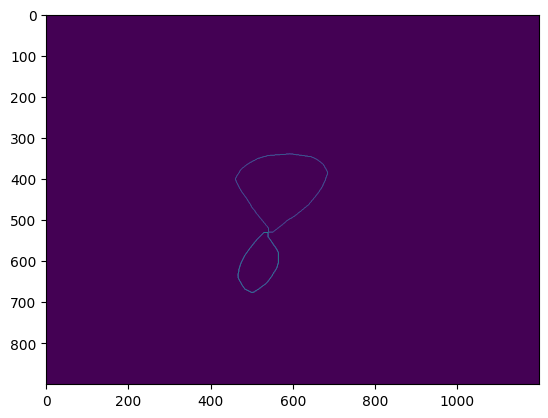

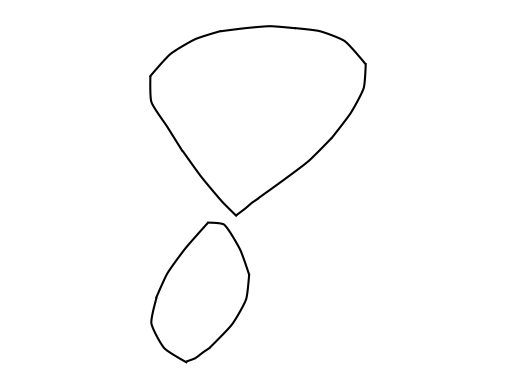

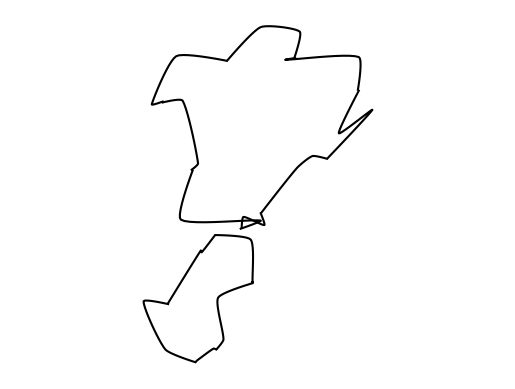

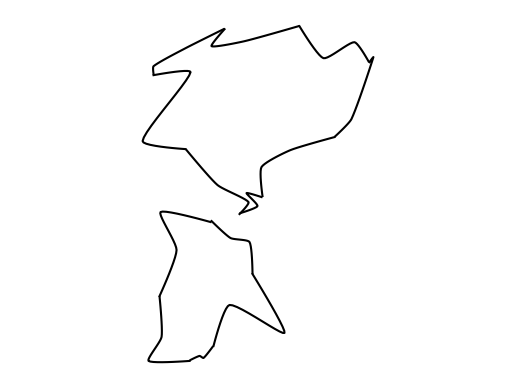

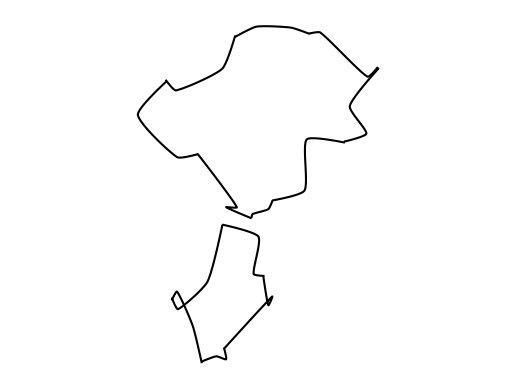

In [15]:
# plt.figure(100)
# plt.imshow(skel)
print(sum(sum(skel)))

pointList = convertBinaryToLists(skel)

# axs = plt.gca()
# axs.axis("equal")
# axs.set_axis_off()
# plt.figure(0)

for i in range(len(pointList)):
    # plt.plot(pointList[i][1], -pointList[i][0], color='black')
    
    print(len(pointList[i][0]))
    control_points = extractControlPoints(pointList[i], degree=3)
    curve = bezier.Curve(control_points, degree=3)
    list_deformedPoints = randomDeform(curve.nodes, numOfDeform, degreeOfShifting * len(pointList[i][0]) / 6)
    ind = 0
    for point in list_deformedPoints:
        x_curve, y_curve = smoothing_base_bezier(point[0], point[1], k=0.6, closed=False)
        # axs.set_aspect('equal')
        plt.figure(ind)
        # plt.axis('off')
        plt.plot(y_curve, -x_curve, color='black')
        axs = plt.gca()
        axs.axis("equal")
        axs.set_axis_off()
        plt.savefig(pathname + name + '-{0:03}'.format(ind) + '.png')
        img = cv.imread(pathname + name + '-{0:03}'.format(ind) + '.png', 0)
        kernel = np.ones((25, 25), 'uint8')
        dilate_img = cv.dilate(255-img, kernel, iterations=1)
        cv.imwrite(pathname + name + '-{0:03}-thick'.format(ind) + '.png', dilate_img)
        ind += 1
# plt.close('all')